# Explore here

In [81]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# escalado
from sklearn.preprocessing import StandardScaler


# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


# selecicon
from sklearn.feature_selection import f_classif, SelectKBest




In [26]:
df = pd.read_csv("AB_NYC_2019.csv")

In [27]:
#Utilizamos 'to_csv' para guardar los datos del mismo en la carpeta de raw

df.to_csv("../data/raw/total_data.csv", index=False)

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [28]:
#Conocer las dimensiones y tipologías de datos del objeto con el que estamos trabajando es vital

df.shape

(48895, 16)

In [29]:
# Obtener información sobre tipos de datos y valores no nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [30]:
#Utilizamos el método 'isna' para conocer cuántos valores nulos hay por columna:

total_nans = df.isna().sum()
total_nans

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Podemos observar que tenemos 16 valores nulos en "name", 21 en "host_name y 10052 tanto en "last_review" y "reviews_per_month"

In [83]:
#Usamos el método duplicated() para detectar duplicados en un DataFrame y sum() para contar el número de duplicados.

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

Por los resultados obtenidos, podemos cocncluir que no tenemos ningún duplicado.

In [32]:
# Eliminaremos los datos que no son relevantes o influyentes para nuestro análisis

df.drop(["id","name","host_name"], axis=1, inplace=True)

Comprobamos que se han eliminado las columnas correctamente

In [33]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Eliminamos las columnas de "last_review", "reviews_per_month", ya que un 20% de los datos son nulos.

In [34]:
# Para la eliminación de datos irrelevantes utilizaríamos el siguiente código:

df.drop(["last_review", "reviews_per_month"], axis = 1, inplace = True)


# Cuando ponemos axis=1 es que se eliminan por columnas, en el caso que queramos eliminar filas, axis=0
# Cuando el inplace está en True, hace cambios en el Dataframe original

df.head()


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


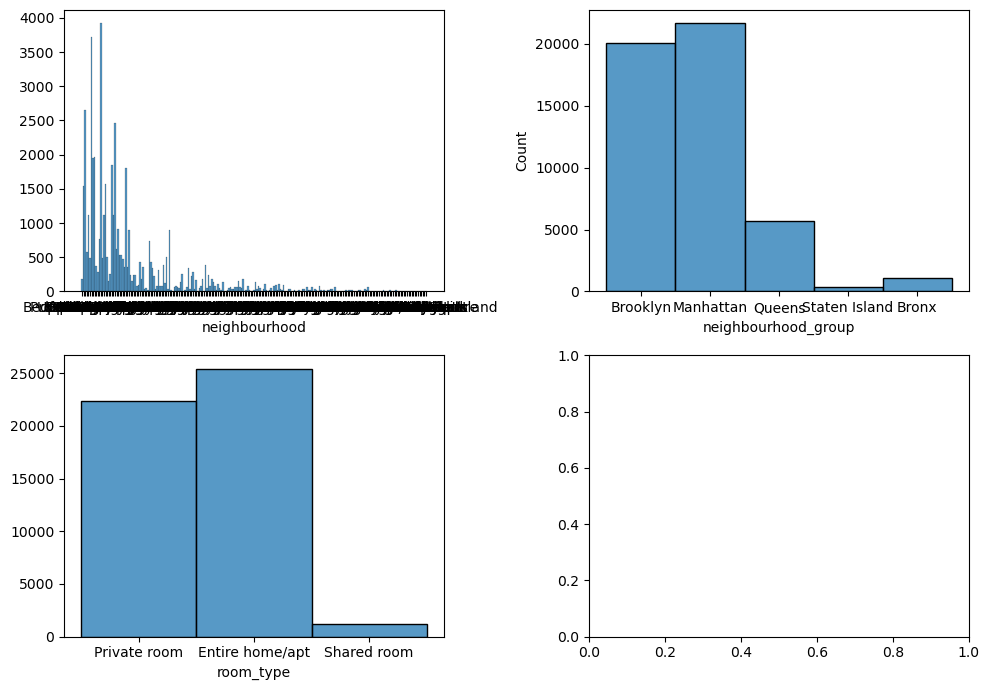

In [35]:
# Vamos a definir las variantes tanto categóricas como univariantes. Primero empezaremos analizando las categóricas:

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = df, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "neighbourhood_group")
sns.histplot(ax = axis[1, 0], data = df, x = "room_type").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


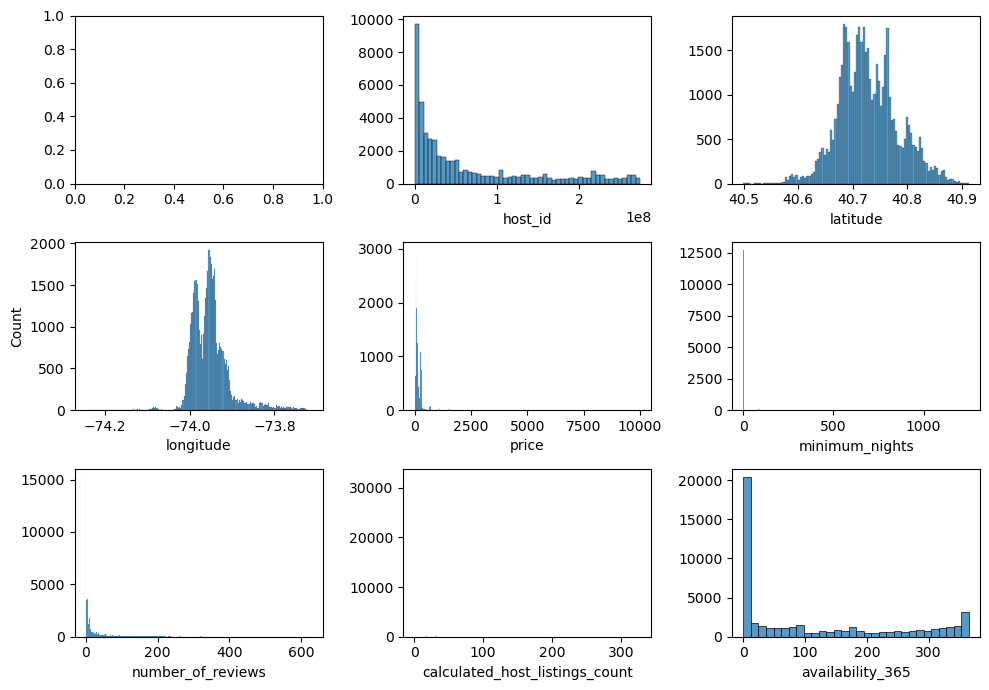

In [36]:
# Vamos a definir las variantes univariantes numéricas:

import matplotlib.pyplot as plt 
import seaborn as sns

#fig, axis = plt.subplots(3, 3, figsize = (10, 7))
fig, axis = plt.subplots(3,3, figsize = (10, 7), gridspec_kw={'height_ratios': [2,2,2]})

# Crear un histograma múltiple

sns.histplot(ax = axis[0, 1], data = df, x = "host_id").set(ylabel = None)
sns.histplot(ax = axis[0, 2], data = df, x = "latitude").set(ylabel = None)

sns.histplot(ax = axis[1, 0], data = df, x = "longitude")
sns.histplot(ax = axis[1, 1], data = df, x = "price").set(ylabel = None)
sns.histplot(ax = axis[1, 2], data = df, x = "minimum_nights").set(ylabel = None)

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews").set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "calculated_host_listings_count").set(ylabel = None)
sns.histplot(ax = axis[2, 2], data = df, x = "availability_365").set(ylabel = None)


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

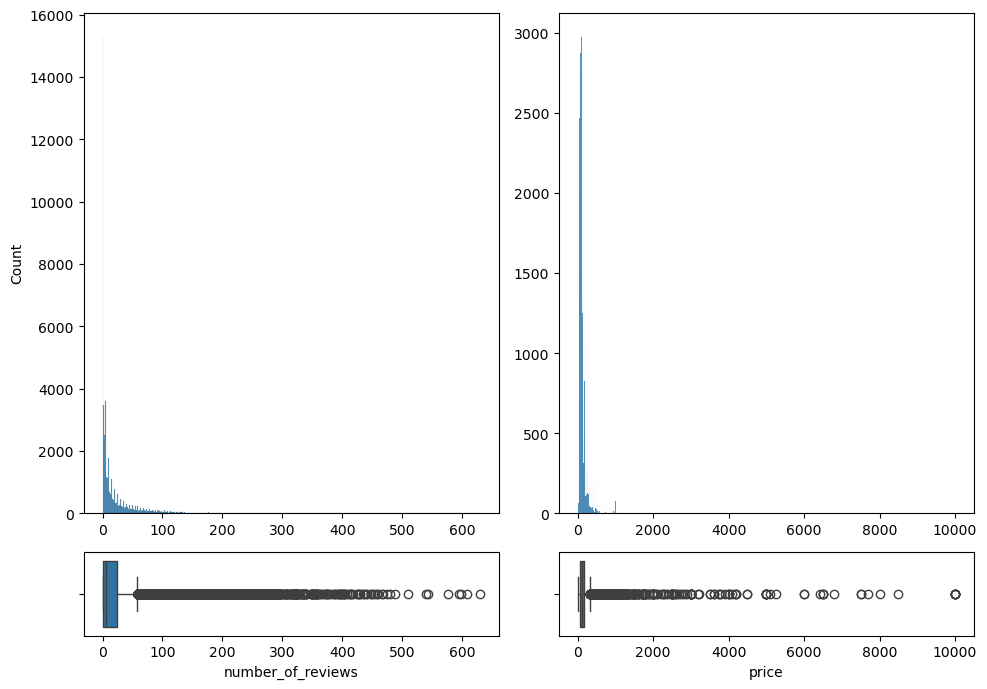

In [37]:
# Vamos a definir las variantes de precio y número de reviews:

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "number_of_reviews")
sns.histplot(ax = axis[0, 1], data = df, x = "price").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

CHECK FOR UNIQUE NEIGHBOURGHOOD GROUPS

In [38]:
print(f"Unique neighborhood groups: {len(df['neighbourhood_group'].unique())}")
print(f"Unique neighborhood: {len(df['neighbourhood'].unique())}")

Unique neighborhood groups: 5
Unique neighborhood: 221


<Axes: xlabel='neighbourhood_group', ylabel='price'>

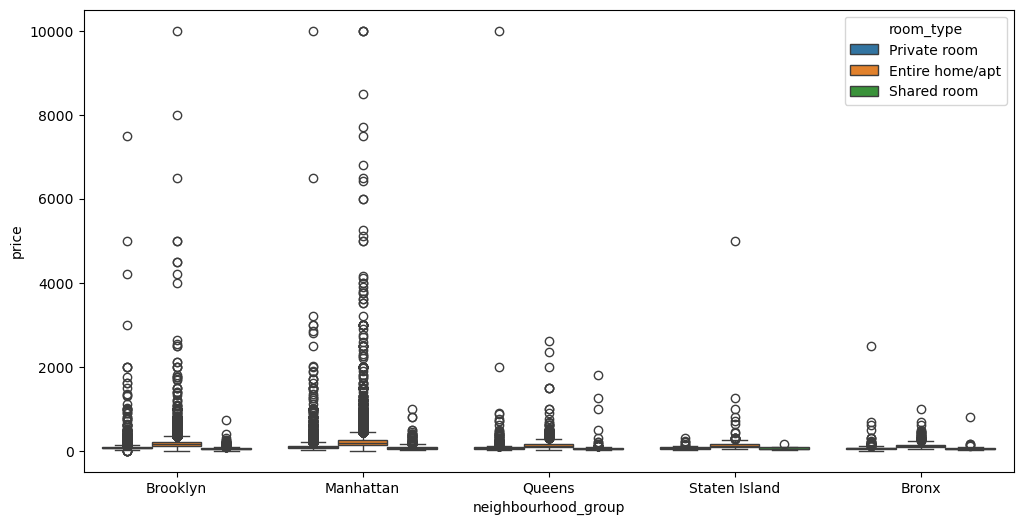

In [39]:
#Vamos a analizar la distribución de precios en función del neigbourhood_group

plt.figure(figsize=(12,6))
sns.boxplot(x='neighbourhood_group', y='price',hue='room_type', data=df)



<Axes: xlabel='neighbourhood_group', ylabel='price'>

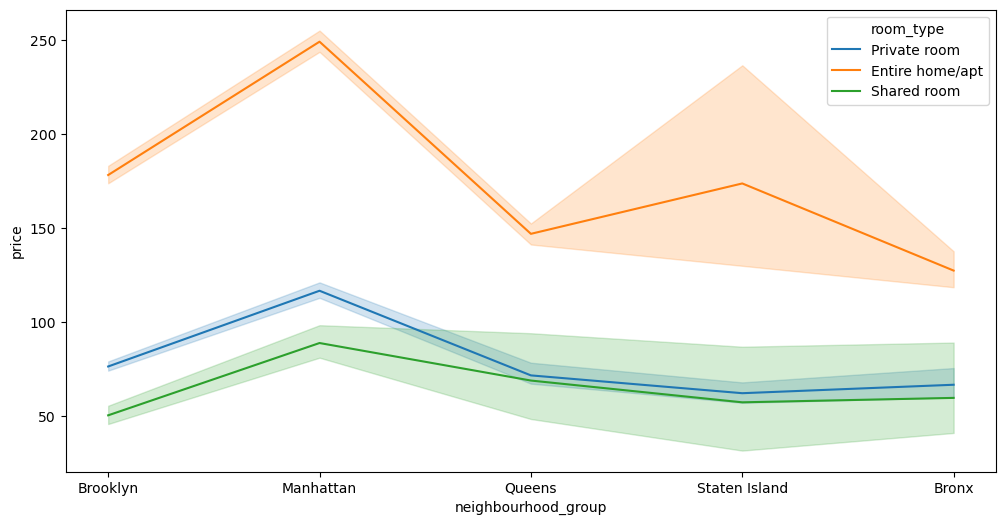

In [40]:
#Aquí mostramos como hay muchas viviendas por encima de la media

plt.figure(figsize=(12,6))
sns.lineplot(y='price', x='neighbourhood_group', data= df, hue='room_type')

VALORES ATÍPICOS (OUTLIERS)

In [41]:
# Vamos a ver cuáles son nuestros outliers para que nuestro dataset quede lo más limpio posible.

#El análisis descriptivo es una poderosa herramienta para caracterizar el conjunto de datos:

df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


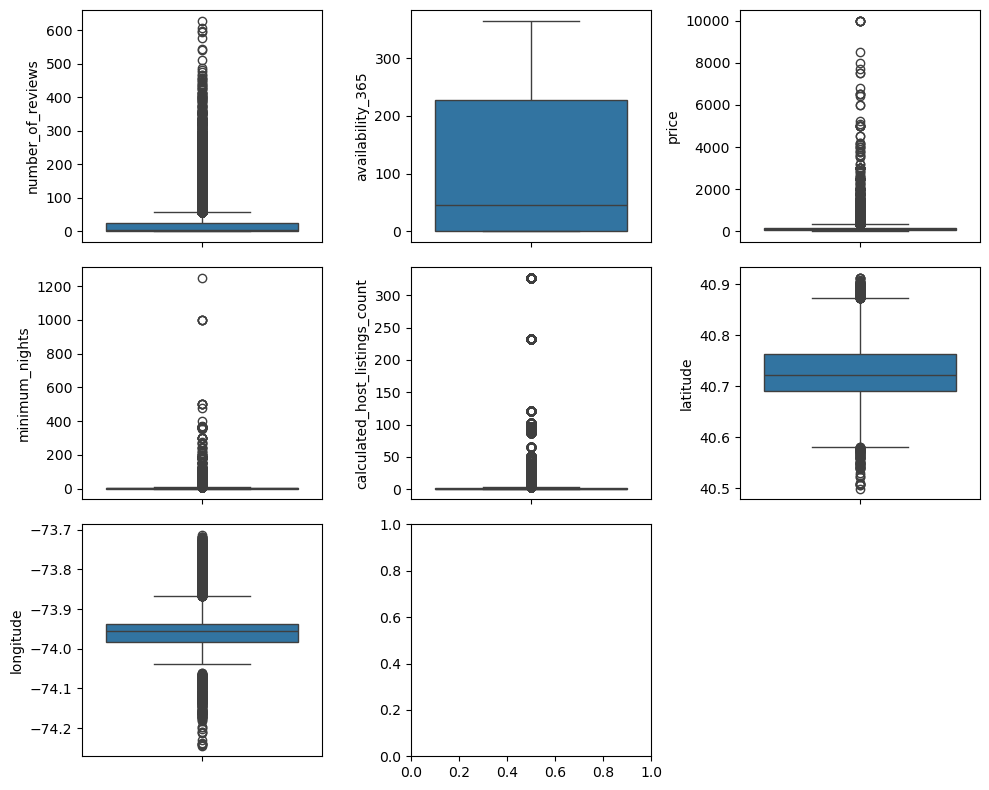

In [45]:
#Dibujar los diagramas de cajas de las variables nos da información poderosa para ver los valores atípicos:

fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[0, 1], data = df, y = "availability_365")
sns.boxplot(ax = axis[0, 2], data = df, y = "price")
sns.boxplot(ax = axis[1, 0], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 2], data = df, y = "latitude")
sns.boxplot(ax = axis[2, 0], data = df, y = "longitude")


fig.delaxes(axis[2, 2])
plt.tight_layout()

plt.show()


Interpretación boxplot box:
Cuadro: representa el rango intercuartil (IQR), donde se encuentra el 50% medio de los valores RMSE. La línea dentro del cuadro muestra la mediana RMSE.
Bigotes: Extender a los valores mínimo y máximo dentro de 1,5 * RIQ de los cuartiles.
Valor atípico: cualquier punto fuera de los bigotes se considera un valor atípico. En este gráfico, hay un valor atípico que indica que un pliegue tenía un RMSE 

Vamos a ver qué valores faltantes o nulos tenemos en nuestro Dataset:

In [47]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Como vemos que está limpio, pasamos a escalar nuestros datos

SCALING

In [60]:
num_variables=["latitude","availability_365", "minimum_nights","number_of_reviews", "calculated_host_listings_count", "longitude","host_id"]
df_encoded=df

In [61]:
#Vamos primero a escalar, codificar y por último separar.
#-Escalado:

# instancio el escalador
scaler = StandardScaler()

#Entreno y aplico el escalador
df_encoded[num_variables] = scaler.fit_transform(df_encoded[num_variables])
df_encoded.head()



,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,-0.860159,Brooklyn,Kensington,-1.493849,-0.437652,Private room,149,-0.293996,-0.320414,-0.034716,1.916250
1,-0.860158,Manhattan,Midtown,0.452436,-0.684639,Entire home/apt,225,-0.293996,0.487665,-0.156104,1.840275
2,-0.860135,Manhattan,Harlem,1.468399,0.222497,Private room,150,-0.196484,-0.522433,-0.186451,1.916250
3,-0.860132,Brooklyn,Clinton Hill,-0.803398,-0.164450,Entire home/apt,89,-0.293996,5.538156,-0.186451,0.617065
4,-0.860103,Manhattan,East Harlem,1.275660,0.177216,Entire home/apt,80,0.144807,-0.320414,-0.186451,-0.856865


CODIFICACIÓN

In [73]:
#Vamos a codificar las variables categóricas
df_encoded_copy=df_encoded.copy()

# instancio el encoder
label_encoder_neighbourhood = LabelEncoder()

# entreno el encoder con los datos de entrenamiento
label_encoder_neighbourhood.fit(df_encoded["neighbourhood"])

# aplico el encoder en amhos
df_encoded_copy["neighbourhood_le"]= label_encoder_neighbourhood.transform(df_encoded["neighbourhood"])

df_encoded_copy.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_le
0,-0.860159,Brooklyn,Kensington,-1.493849,-0.437652,Private room,149,-0.293996,-0.320414,-0.034716,1.916250,108
1,-0.860158,Manhattan,Midtown,0.452436,-0.684639,Entire home/apt,225,-0.293996,0.487665,-0.156104,1.840275,127
2,-0.860135,Manhattan,Harlem,1.468399,0.222497,Private room,150,-0.196484,-0.522433,-0.186451,1.916250,94
3,-0.860132,Brooklyn,Clinton Hill,-0.803398,-0.164450,Entire home/apt,89,-0.293996,5.538156,-0.186451,0.617065,41
4,-0.860103,Manhattan,East Harlem,1.275660,0.177216,Entire home/apt,80,0.144807,-0.320414,-0.186451,-0.856865,61


In [74]:

onehotencoder_variables=["neighbourhood_group","room_type"]

# instancio el encoder
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(df_encoded[onehotencoder_variables])

# aplico el encoder en amhos
df_encoded_copy_ohe= onehot_encoder.transform(df_encoded[onehotencoder_variables])
df_encoded_copy_ohe = pd.DataFrame(df_encoded_copy_ohe, index = df_encoded.index, columns=onehot_encoder.get_feature_names_out(onehotencoder_variables))


df_encoded_copy_ohe.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [75]:
df_encoded_copy.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_le
0,-0.860159,Brooklyn,Kensington,-1.493849,-0.437652,Private room,149,-0.293996,-0.320414,-0.034716,1.916250,108
1,-0.860158,Manhattan,Midtown,0.452436,-0.684639,Entire home/apt,225,-0.293996,0.487665,-0.156104,1.840275,127
2,-0.860135,Manhattan,Harlem,1.468399,0.222497,Private room,150,-0.196484,-0.522433,-0.186451,1.916250,94
3,-0.860132,Brooklyn,Clinton Hill,-0.803398,-0.164450,Entire home/apt,89,-0.293996,5.538156,-0.186451,0.617065,41
4,-0.860103,Manhattan,East Harlem,1.275660,0.177216,Entire home/apt,80,0.144807,-0.320414,-0.186451,-0.856865,61


In [76]:
#Vamos a juntar los dos Dataframes

df_encoded_final=pd.concat([df_encoded_copy,df_encoded_copy_ohe], axis=1)
df_encoded_final.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_le,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-0.860159,Brooklyn,Kensington,-1.493849,-0.437652,Private room,149,-0.293996,-0.320414,-0.034716,1.916250,108,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.860158,Manhattan,Midtown,0.452436,-0.684639,Entire home/apt,225,-0.293996,0.487665,-0.156104,1.840275,127,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.860135,Manhattan,Harlem,1.468399,0.222497,Private room,150,-0.196484,-0.522433,-0.186451,1.916250,94,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.860132,Brooklyn,Clinton Hill,-0.803398,-0.164450,Entire home/apt,89,-0.293996,5.538156,-0.186451,0.617065,41,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.860103,Manhattan,East Harlem,1.275660,0.177216,Entire home/apt,80,0.144807,-0.320414,-0.186451,-0.856865,61,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [77]:
df_encoded_final.dtypes

host_id                              float64
neighbourhood_group                   object
neighbourhood                         object
latitude                             float64
longitude                            float64
room_type                             object
price                                  int64
minimum_nights                       float64
number_of_reviews                    float64
calculated_host_listings_count       float64
availability_365                     float64
neighbourhood_le                       int64
neighbourhood_group_Bronx            float64
neighbourhood_group_Brooklyn         float64
neighbourhood_group_Manhattan        float64
neighbourhood_group_Queens           float64
neighbourhood_group_Staten Island    float64
room_type_Entire home/apt            float64
room_type_Private room               float64
room_type_Shared room                float64
dtype: object

In [79]:
#Quitamos las columnas donde el datatype es "object"

df_encoded_final= df_encoded_final.select_dtypes(exclude="object")

In [80]:
# Dividimos el conjunto de datos en muestras de train y test

X = df_encoded_final.drop("price", axis = 1)
y = df_encoded_final["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


X_train.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_le,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
32645,-0.745212,-0.241683,-0.067821,-0.196484,-0.275520,-0.186451,-0.849267,214,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
23615,0.179695,2.204698,0.253262,-0.245240,-0.477540,-0.186451,-0.856865,206,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
31183,-0.844689,-0.715555,-0.158167,-0.245240,-0.522433,-0.156104,-0.856865,13,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
29260,-0.807699,-0.819352,0.454751,-0.196484,1.430423,-0.186451,1.171688,13,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7275,-0.507846,0.331951,1.224744,-0.098973,-0.230627,-0.186451,-0.856865,220,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [82]:
#Vamos a modelar para así poder sacar nuestro análisis:

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

# Display the evaluation metrics
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 235.00800470519218
Test RMSE: 197.11405045057387
Train R-squared: 0.09499892091385798
Test R-squared: 0.1217112001414431


/Users/nataliagarciavila/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/nataliagarciavila/miniconda3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Este modelo no nos predice con la precisión para poder obtener unas predicciones claras.

El error promedio que se está generando es de 200 aprox.
La probabilidad de acertar es de un 12%
Para mejorar las predicciones, podríamos hacer optimizaciones sobre los hiperparámetros, generar nuevas características que muestren la relación entre variables o utilizar un modelo diferente.